In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import numpy as np 
import pandas as pd

In [3]:
rs_cols = ['user_id', 'movie_id', 'rating', 'unix_timestamp']
rs_cols1=['movie_id', 'movie_name','genre']

ratings= pd.read_csv('Dataset/ml-1m/ratings.dat', sep='::', names=rs_cols, encoding='latin-1')
movies= pd.read_csv('Dataset/ml-1m/movies.dat', sep='::', names=rs_cols1, encoding='latin-1')

In [4]:
ratings = pd.merge(ratings, movies, on= 'movie_id')

In [5]:
ratings

,user_id,movie_id,rating,unix_timestamp,movie_name,genre
0,1,1193,5,978300760,One Flew Over the Cuckoo's Nest (1975),Drama
1,2,1193,5,978298413,One Flew Over the Cuckoo's Nest (1975),Drama
2,12,1193,4,978220179,One Flew Over the Cuckoo's Nest (1975),Drama
3,15,1193,4,978199279,One Flew Over the Cuckoo's Nest (1975),Drama
4,17,1193,5,978158471,One Flew Over the Cuckoo's Nest (1975),Drama
...,...,...,...,...,...,...
1000204,5949,2198,5,958846401,Modulations (1998),Documentary
1000205,5675,2703,3,976029116,Broken Vessels (1998),Drama
1000206,5780,2845,1,958153068,White Boys (1999),Drama
1000207,5851,3607,5,957756608,One Little Indian (1973),Comedy|Drama|Western


In [6]:
ratings = ratings.iloc[:,].reset_index(drop=True)
ratings= ratings.drop(["unix_timestamp"],axis=1).drop(["genre"], axis=1)

In [7]:
ratings

,user_id,movie_id,rating,movie_name
0,1,1193,5,One Flew Over the Cuckoo's Nest (1975)
1,2,1193,5,One Flew Over the Cuckoo's Nest (1975)
2,12,1193,4,One Flew Over the Cuckoo's Nest (1975)
3,15,1193,4,One Flew Over the Cuckoo's Nest (1975)
4,17,1193,5,One Flew Over the Cuckoo's Nest (1975)
...,...,...,...,...
1000204,5949,2198,5,Modulations (1998)
1000205,5675,2703,3,Broken Vessels (1998)
1000206,5780,2845,1,White Boys (1999)
1000207,5851,3607,5,One Little Indian (1973)


In [8]:
rating_t = ratings.copy()


In [9]:
rating_t

,user_id,movie_id,rating,movie_name
0,1,1193,5,One Flew Over the Cuckoo's Nest (1975)
1,2,1193,5,One Flew Over the Cuckoo's Nest (1975)
2,12,1193,4,One Flew Over the Cuckoo's Nest (1975)
3,15,1193,4,One Flew Over the Cuckoo's Nest (1975)
4,17,1193,5,One Flew Over the Cuckoo's Nest (1975)
...,...,...,...,...
1000204,5949,2198,5,Modulations (1998)
1000205,5675,2703,3,Broken Vessels (1998)
1000206,5780,2845,1,White Boys (1999)
1000207,5851,3607,5,One Little Indian (1973)


In [10]:

rating_stack = rating_t

In [11]:

rating_stack2 = rating_stack.drop(rating_stack[rating_stack['rating']=='0'].index, axis=1) 
rating_stack2

,user_id,movie_id,rating,movie_name
0,1,1193,5,One Flew Over the Cuckoo's Nest (1975)
1,2,1193,5,One Flew Over the Cuckoo's Nest (1975)
2,12,1193,4,One Flew Over the Cuckoo's Nest (1975)
3,15,1193,4,One Flew Over the Cuckoo's Nest (1975)
4,17,1193,5,One Flew Over the Cuckoo's Nest (1975)
...,...,...,...,...
1000204,5949,2198,5,Modulations (1998)
1000205,5675,2703,3,Broken Vessels (1998)
1000206,5780,2845,1,White Boys (1999)
1000207,5851,3607,5,One Little Indian (1973)


In [12]:
uniques = sorted(rating_stack2['rating'].unique())
print('Unique values in rating: {}'.format(uniques))
#rating_stack2.rating.replace('6','5',inplace=True)

Unique values in rating: [1, 2, 3, 4, 5]


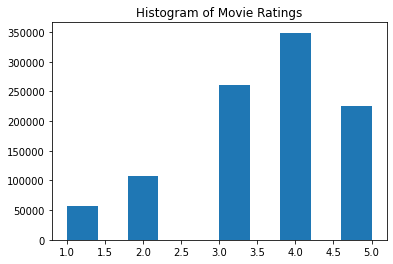

In [13]:

import matplotlib.pyplot as plt
%matplotlib inline

plt.hist(rating_stack2.rating, bins=10)
plt.title('Histogram of Movie Ratings')
plt.show()

In [14]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(ratings, test_size=0.2)

In [15]:
train


,user_id,movie_id,rating,movie_name
783402,1181,1556,1,Speed 2: Cruise Control (1997)
73826,2890,1792,3,U.S. Marshalls (1998)
397489,5275,300,5,Quiz Show (1994)
580433,2265,3494,4,True Grit (1969)
39723,4729,2762,4,"Sixth Sense, The (1999)"
...,...,...,...,...
897089,5493,2750,5,Radio Days (1987)
802864,1179,2363,3,Godzilla (Gojira) (1954)
306088,3205,2683,1,Austin Powers: The Spy Who Shagged Me (1999)
406887,4864,3751,4,Chicken Run (2000)


In [16]:
test

,user_id,movie_id,rating,movie_name
693139,2106,2648,5,Frankenstein (1931)
170729,167,1784,2,As Good As It Gets (1997)
694941,3229,330,1,Tales from the Hood (1995)
280879,3503,3100,5,"River Runs Through It, A (1992)"
454093,5110,1283,4,High Noon (1952)
...,...,...,...,...
26468,1584,527,5,Schindler's List (1993)
778458,731,2262,4,About Last Night... (1986)
484827,3475,924,3,2001: A Space Odyssey (1968)
469054,2663,1009,4,Escape to Witch Mountain (1975)


In [17]:
y_true = test.rating 

In [18]:
y_true

693139    5
170729    2
694941    1
280879    5
454093    4
         ..
26468     5
778458    4
484827    3
469054    4
237146    5
Name: rating, Length: 200042, dtype: int64

In [36]:
import keras

n_latent_factors_user = 20
n_latent_factors_movie = 50
n_latent_factors_mf = 5
n_users = ratings['user_id'].unique().max()
n_movies = ratings['movie_id'].unique().max()

In [37]:
n_users

6040

In [38]:
n_movies

3952

In [39]:
movie_input = keras.layers.Input(shape=[1],name='Item')
movie_embedding_mlp = keras.layers.Embedding(n_movies + 1, n_latent_factors_movie, name='Movie-Embedding-MLP')(movie_input)
movie_vec_mlp = keras.layers.Flatten(name='FlattenMovies-MLP')(movie_embedding_mlp)
movie_vec_mlp = keras.layers.Dropout(0.2)(movie_vec_mlp)

In [40]:
movie_embedding_mf = keras.layers.Embedding(n_movies + 1, n_latent_factors_mf, name='Movie-Embedding-MF')(movie_input)
movie_vec_mf = keras.layers.Flatten(name='FlattenMovies-MF')(movie_embedding_mf)
movie_vec_mf = keras.layers.Dropout(0.2)(movie_vec_mf)

In [41]:
user_input = keras.layers.Input(shape=[1],name='User')
user_vec_mlp = keras.layers.Flatten(name='FlattenUsers-MLP')(keras.layers.Embedding(n_users + 1, n_latent_factors_user,name='User-Embedding-MLP')(user_input))
user_vec_mlp = keras.layers.Dropout(0.2)(user_vec_mlp)

In [42]:
user_vec_mf = keras.layers.Flatten(name='FlattenUsers-MF')(keras.layers.Embedding(n_users + 1, n_latent_factors_mf,name='User-Embedding-MF')(user_input))
user_vec_mf = keras.layers.Dropout(0.2)(user_vec_mf)

In [43]:
concat = keras.layers.concatenate([movie_vec_mlp, user_vec_mlp], axis=1, name='Concat')

In [44]:
concat_dropout = keras.layers.Dropout(0.2)(concat)
dense = keras.layers.Dense(200,name='FullyConnected', activation='relu')(concat_dropout)
dense_batch = keras.layers.BatchNormalization(name='Batch')(dense)
dropout_1 = keras.layers.Dropout(0.2,name='Dropout-1')(dense_batch)
dense_2 = keras.layers.Dense(100,name='FullyConnected-1',activation='relu')(dropout_1)
dense_batch_2 = keras.layers.BatchNormalization(name='Batch-2')(dense_2)


In [45]:
dropout_2 = keras.layers.Dropout(0.2,name='Dropout-2')(dense_batch_2)
dense_3 = keras.layers.Dense(50,name='FullyConnected-2', activation='relu')(dropout_2)
dense_4 = keras.layers.Dense(20,name='FullyConnected-3', activation='relu')(dense_3)

In [46]:
pred_mf = keras.layers.Multiply()([movie_vec_mf, user_vec_mf])
pred_mlp = keras.layers.Dense(1, activation='relu',name='Activation')(dense_4)
combine_mlp_mf = keras.layers.concatenate([pred_mf, pred_mlp],name='Concat-MF-MLP')

In [47]:
result_combine = keras.layers.Dense(100,name='Combine-MF-MLP')(combine_mlp_mf)
deep_combine = keras.layers.Dense(100,name='FullyConnected-4')(result_combine)

In [48]:
result = keras.layers.Dense(1,name='Prediction', activation='relu')(result_combine)
model = keras.Model([user_input, movie_input], result)
opt = keras.optimizers.Adam(lr =0.01)
model.compile(optimizer='adam',loss= 'mean_absolute_error')

In [49]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
Item (InputLayer)               [(None, 1)]          0                                            
__________________________________________________________________________________________________
User (InputLayer)               [(None, 1)]          0                                            
__________________________________________________________________________________________________
Movie-Embedding-MLP (Embedding) (None, 1, 50)        197650      Item[0][0]                       
__________________________________________________________________________________________________
User-Embedding-MLP (Embedding)  (None, 1, 20)        120820      User[0][0]                       
____________________________________________________________________________________________

In [60]:
history = model.fit([train.user_id, train.movie_id], train.rating, epochs=5, batch_size=128,verbose=1, validation_split=0.1)

Epoch 1/5
5627/5627 [==============================] - 16s 3ms/step - loss: 0.6397 - val_loss: 0.6793
Epoch 2/5
5627/5627 [==============================] - 16s 3ms/step - loss: 0.6401 - val_loss: 0.6777
Epoch 3/5
5627/5627 [==============================] - 17s 3ms/step - loss: 0.6393 - val_loss: 0.6783
Epoch 4/5
5627/5627 [==============================] - 17s 3ms/step - loss: 0.6393 - val_loss: 0.6783
Epoch 5/5
5627/5627 [==============================] - 17s 3ms/step - loss: 0.6392 - val_loss: 0.6779


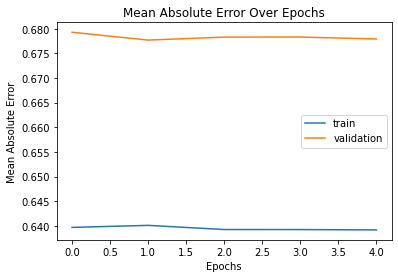

In [61]:
def plot_acc(history):
    plt.plot(np.array(history.history['loss']))
    plt.plot(np.array(history.history['val_loss']))
    plt.ylabel('Mean Absolute Error')
    plt.xlabel('Epochs')
    plt.legend(['train', 'validation'])
    plt.title('Mean Absolute Error Over Epochs')
    
plot_acc(history)

In [62]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
y_true = test.rating

x_pred=np.round(model.predict([test.user_id, test.movie_id]),0)

In [63]:

rmse = np.sqrt(mean_squared_error(y_true, x_pred))
errors = mean_absolute_error(y_true, x_pred)
mape = 100 * (errors / y_true)
accuracy = 100 - np.mean(mape)
print('MAE for testing: {}'.format(round(mean_absolute_error(y_true, x_pred)), 4))
print("Root Mean Square Error: {} ".format(round(rmse, 4)))
print('Accuracy: {} %.'.format(round(accuracy, 2)))

MAE for testing: 1.0
Root Mean Square Error: 0.961 
Accuracy: 78.06 %.


In [210]:
mlp_user_embedding_weights = (next(iter(filter(lambda x: x.name == 'User-Embedding-MLP', model.layers))).get_weights())

# get the latent embedding for your desired user
user_latent_matrix = mlp_user_embedding_weights[0]

desired_user_id = 38 # User: Xinyue Liu 
one_user_vector = user_latent_matrix[desired_user_id,:]
one_user_vector = np.reshape(one_user_vector, (1,10))

from sklearn.cluster import KMeans

print('\nPerforming kmeans to find the nearest users...')
# get similar users
kmeans = KMeans(n_clusters=20, random_state=0, verbose=0).fit(user_latent_matrix)
desired_user_label = kmeans.predict(one_user_vector)
user_label = kmeans.labels_
neighbors = []
for user_id, user_label in enumerate(user_label):
    if user_label == desired_user_label:
        neighbors.append(user_id)
print('Found {0} neighbor users.'.format(len(neighbors)))


Performing kmeans to find the nearest users...
Found 334 neighbor users.


In [212]:
# get the movies in 3 similar users' movies
movies = []
for user_id in neighbors:
    movies += list(ratings[ratings['user_id'] == int(user_id)]['movie_id'])
movies = list(set(movies))
print('Found {0} neighbor movies from these users.'.format(len(movies)))

Found 2948 neighbor movies from these users.


In [213]:
users = np.full(len(movies), desired_user_id, dtype='int32')
items = np.array(movies, dtype='int32')

print('\nRanking most likely tracks using the NeuMF model...')
# and predict movies for my user
results = model.predict([users,items],batch_size=10, verbose=0) 
results = results.tolist()
print('Ranked the movies!')


Ranking most likely tracks using the NeuMF model...
Ranked the movies!


In [214]:
results = pd.DataFrame(results, columns=['Rating']).astype("float")
items = pd.DataFrame(items, columns=['movie_id'])
results = pd.concat([items, results], ignore_index=True, sort=False, axis=1)
results.columns =['movie_id', 'Rating'] 

results_df = pd.DataFrame(np.nan, index=range(len(results)), columns=['Rating','Movie'])

# loop through and get the ratings (of being interested by desired user according to my model)
for index, row in results.iterrows():
    results_df.loc[index] = [row['Rating'], ratings[ratings['movie_id'] == row['movie_id']] #.iloc[0]['movie_id']]
                         
results_df = results_df.sort_values(by=['Rating'], ascending=False)

results_df.head(5)

SyntaxError: invalid syntax (<ipython-input-214-675e1a2b43ae>, line 12)

In [215]:
results = pd.DataFrame(results, columns=['Rating']).astype("float")
items = pd.DataFrame(items, columns=['movie_id'])
results = pd.concat([items, results], ignore_index=True, sort=False, axis=1)
results.columns =['movie_id', 'Rating'] 

In [216]:
results

,movie_id,Rating
0,1,4.029122
1,2,3.044104
2,3,2.945456
3,4,3.017002
4,5,3.030659
...,...,...
2943,3948,4.016878
2944,3949,4.859540
2945,3950,2.964056
2946,3951,4.018541


In [217]:
items

,movie_id
0,1
1,2
2,3
3,4
4,5
...,...
2943,3948
2944,3949
2945,3950
2946,3951


In [218]:
results

,movie_id,Rating
0,1,4.029122
1,2,3.044104
2,3,2.945456
3,4,3.017002
4,5,3.030659
...,...,...
2943,3948,4.016878
2944,3949,4.859540
2945,3950,2.964056
2946,3951,4.018541


In [219]:
results

,movie_id,Rating
0,1,4.029122
1,2,3.044104
2,3,2.945456
3,4,3.017002
4,5,3.030659
...,...,...
2943,3948,4.016878
2944,3949,4.859540
2945,3950,2.964056
2946,3951,4.018541


In [220]:
results_df = pd.DataFrame(np.nan, index=range(len(results)), columns=['Rating','Movie'])

In [221]:
results_df

,Rating,Movie
0,NaN,NaN
1,NaN,NaN
2,NaN,NaN
3,NaN,NaN
4,NaN,NaN
...,...,...
2943,NaN,NaN
2944,NaN,NaN
2945,NaN,NaN
2946,NaN,NaN


In [222]:
for index, row in results.iterrows():
    results_df.loc[index] = [row['Rating'], ratings[ratings['movie_id'] == row['movie_id']].iloc[0]['movie_id']]
                         
results_df = results_df.sort_values(by=['Rating'], ascending=False)

results_df.head(5)

,Rating,Movie
2343,4.985500,3134.0
526,4.980385,668.0
703,4.972587,953.0
528,4.969271,670.0
2308,4.967227,3089.0
